# Charger le Dataset

In [1]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import time
import seaborn as sns

data = pd.read_csv('../dataset_version_4/part2_dataset_low_1800p.csv')

# Informations de base

In [2]:
print(f"la dataset aura la forme suivante : {data.shape} \n")
#print(f"le nombre de NaN par collone :\n{data.isna().sum()} \n")

la dataset aura la forme suivante : (32280, 8) 



# Visulation des donnes

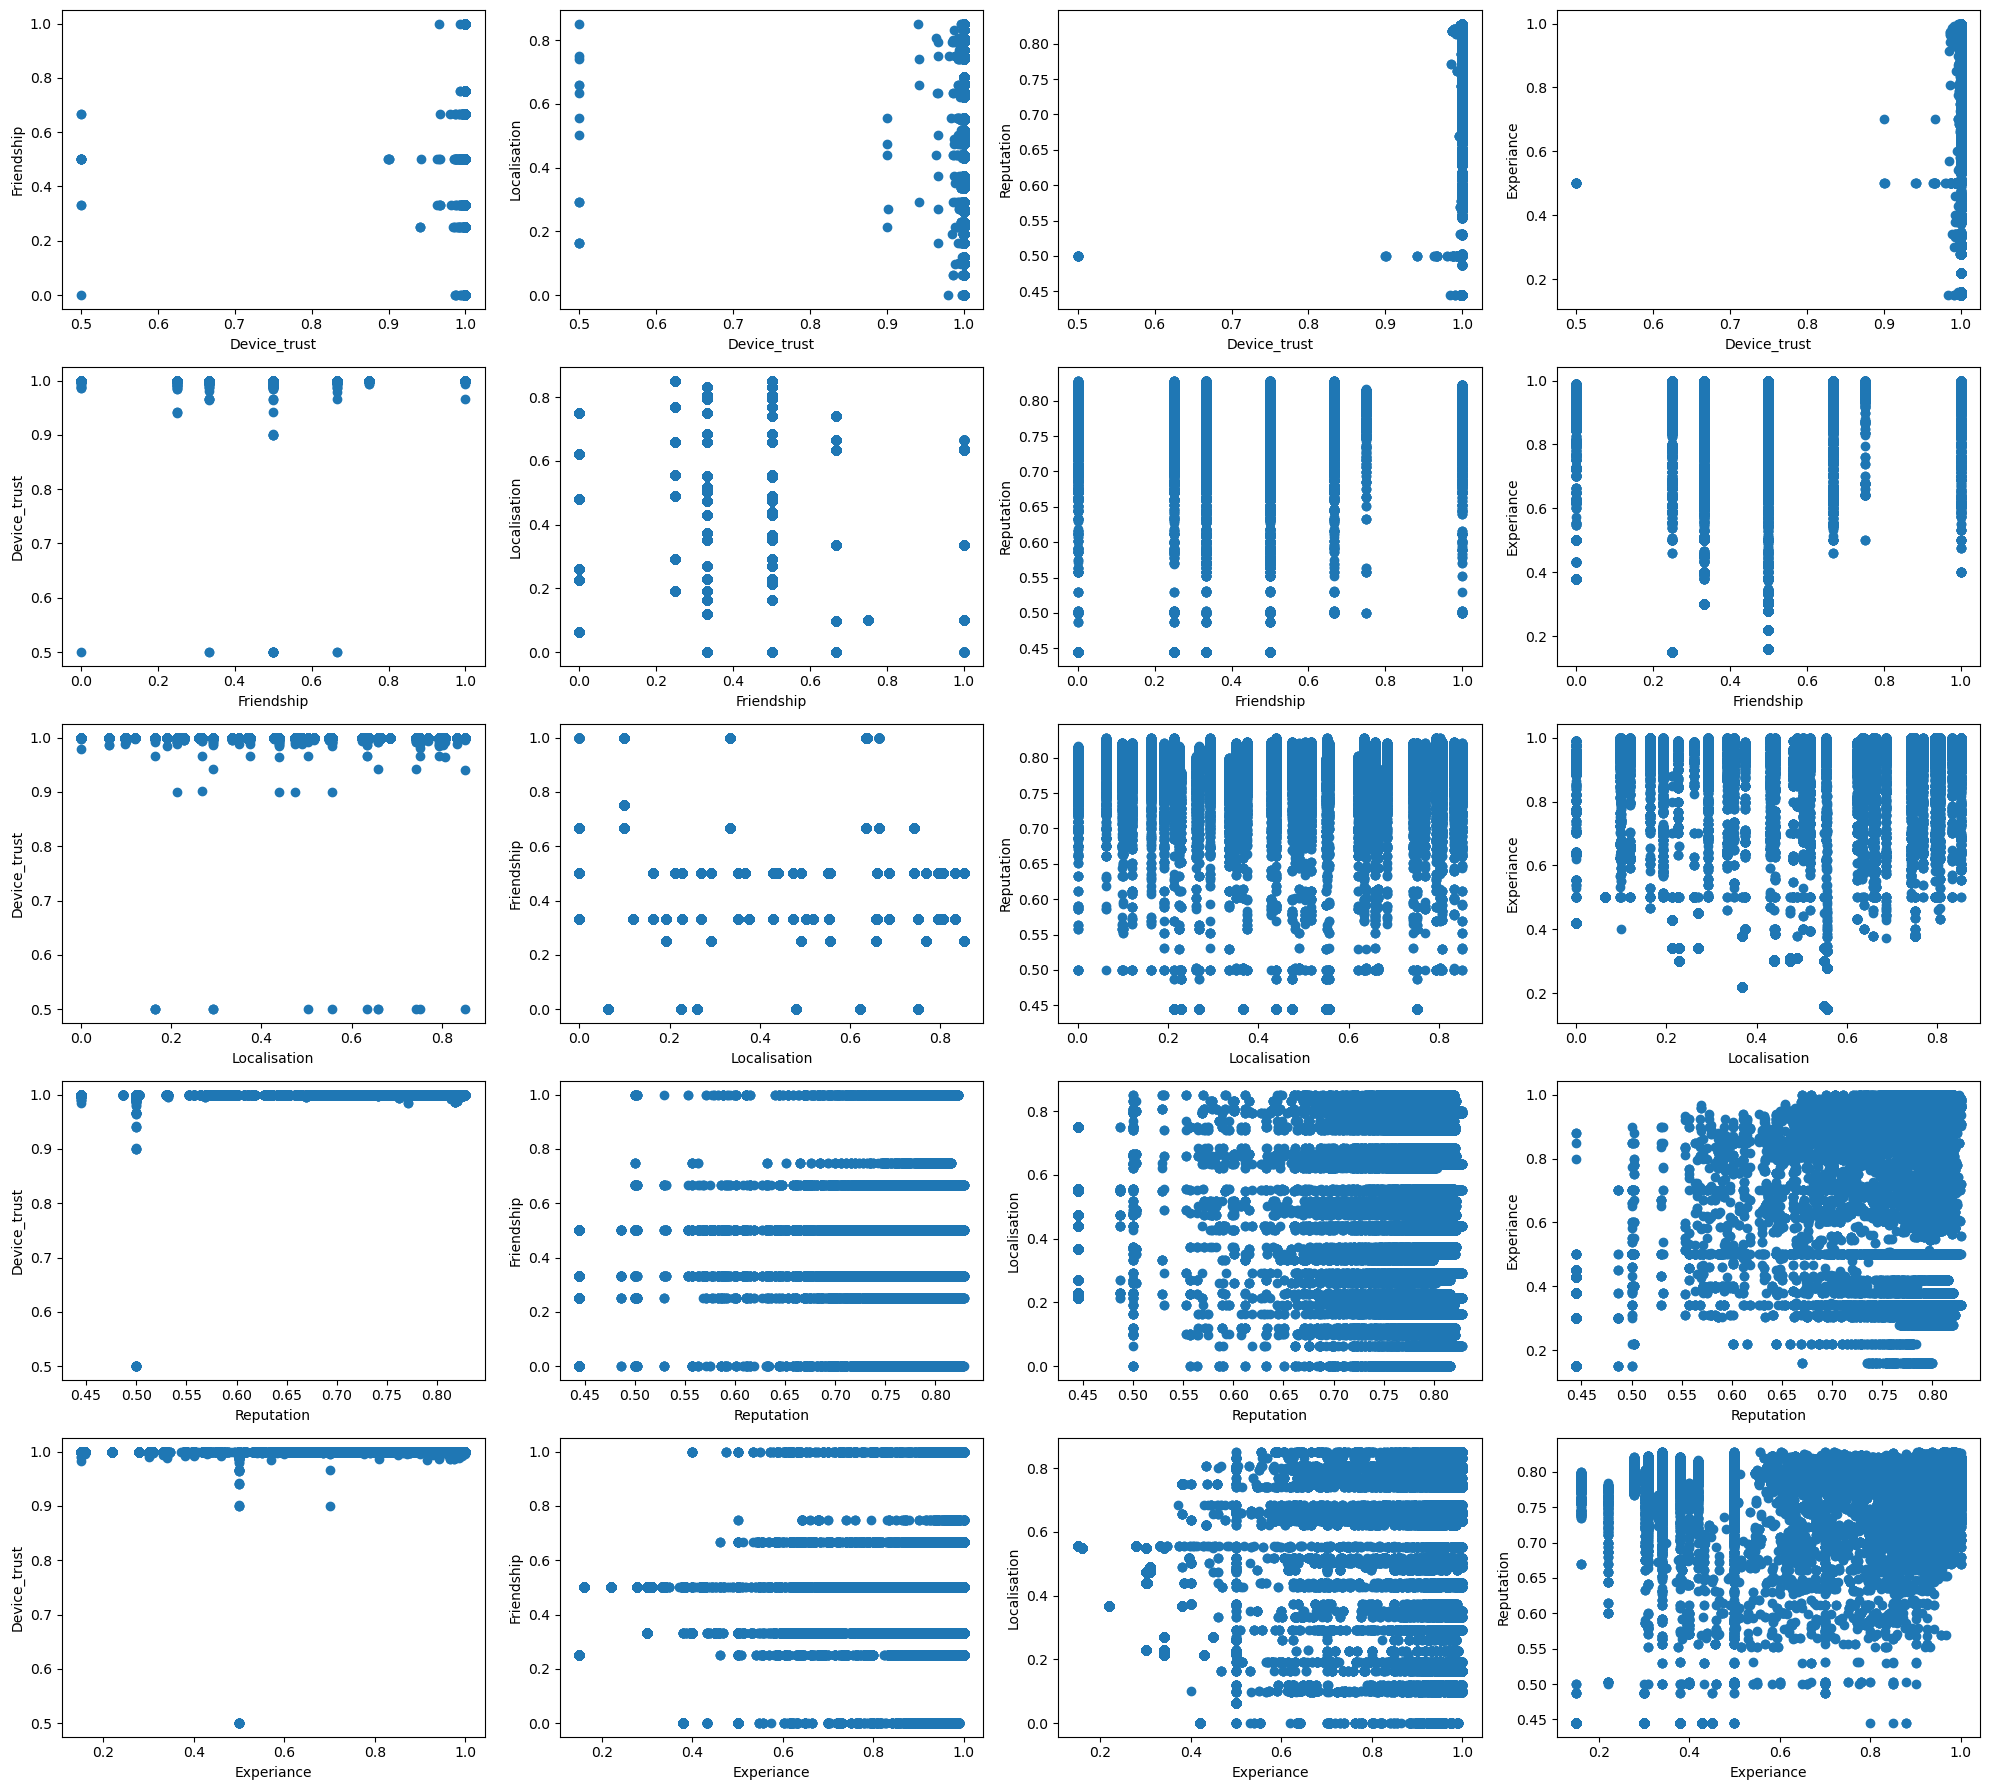

In [3]:
import matplotlib.pyplot as plt
df = data[['Device_trust','Friendship', 'Localisation', 'Reputation','Experiance']]

plt.figure(figsize=(20, 20))  # Create a figure
##--------device trust

plt.subplot(5, 4, 1)
plt.scatter(df['Device_trust'], df['Friendship'],)
plt.xlabel('Device_trust')
plt.ylabel('Friendship')

plt.subplot(5, 4, 2)
plt.scatter(df['Device_trust'], df['Localisation'],)
plt.xlabel('Device_trust')
plt.ylabel('Localisation')

plt.subplot(5, 4, 3)
plt.scatter(df['Device_trust'], df['Reputation'],)
plt.xlabel('Device_trust')
plt.ylabel('Reputation')
   
plt.subplot(5, 4, 4)
plt.scatter(df['Device_trust'], df['Experiance'],)
plt.xlabel('Device_trust')
plt.ylabel('Experiance')    
    
##--------Friendship

plt.subplot(5, 4, 5)
plt.scatter(df['Friendship'], df['Device_trust'],)
plt.xlabel('Friendship')
plt.ylabel('Device_trust')

plt.subplot(5, 4, 6)
plt.scatter(df['Friendship'], df['Localisation'],)
plt.xlabel('Friendship')
plt.ylabel('Localisation')

plt.subplot(5, 4, 7)
plt.scatter(df['Friendship'], df['Reputation'],)
plt.xlabel('Friendship')
plt.ylabel('Reputation')
   
plt.subplot(5, 4, 8)
plt.scatter(df['Friendship'], df['Experiance'],)
plt.xlabel('Friendship')
plt.ylabel('Experiance')   

##--------Localisation

plt.subplot(5, 4, 9)
plt.scatter(df['Localisation'], df['Device_trust'],)
plt.xlabel('Localisation')
plt.ylabel('Device_trust')

plt.subplot(5, 4, 10)
plt.scatter(df['Localisation'], df['Friendship'],)
plt.xlabel('Localisation')
plt.ylabel('Friendship')

plt.subplot(5, 4, 11)
plt.scatter(df['Localisation'], df['Reputation'],)
plt.xlabel('Localisation')
plt.ylabel('Reputation')
   
plt.subplot(5, 4, 12)
plt.scatter(df['Localisation'], df['Experiance'],)
plt.xlabel('Localisation')
plt.ylabel('Experiance') 

##--------Reputation

plt.subplot(5, 4, 13)
plt.scatter(df['Reputation'], df['Device_trust'],)
plt.xlabel('Reputation')
plt.ylabel('Device_trust')

plt.subplot(5, 4, 14)
plt.scatter(df['Reputation'], df['Friendship'],)
plt.xlabel('Reputation')
plt.ylabel('Friendship')

plt.subplot(5, 4, 15)
plt.scatter(df['Reputation'], df['Localisation'],)
plt.xlabel('Reputation')
plt.ylabel('Localisation')
   
plt.subplot(5, 4, 16)
plt.scatter(df['Reputation'], df['Experiance'],)
plt.xlabel('Reputation')
plt.ylabel('Experiance')

##--------Experiance

plt.subplot(5, 4, 17)
plt.scatter(df['Experiance'], df['Device_trust'],)
plt.xlabel('Experiance')
plt.ylabel('Device_trust')

plt.subplot(5, 4, 18)
plt.scatter(df['Experiance'], df['Friendship'],)
plt.xlabel('Experiance')
plt.ylabel('Friendship')

plt.subplot(5, 4, 19)
plt.scatter(df['Experiance'], df['Localisation'],)
plt.xlabel('Experiance')
plt.ylabel('Localisation')
   
plt.subplot(5, 4, 20)
plt.scatter(df['Experiance'], df['Reputation'],)
plt.xlabel('Experiance')
plt.ylabel('Reputation')
    
plt.tight_layout(rect=[0, 0.05, 1, 0.95])   
plt.show()  # Display the plot

# Extraction des features

In [4]:
df1 = data[data['Periode'] > 20]
df1_x = df1[['Device_trust','Friendship', 'Localisation', 'Reputation']]
df1_x.shape

(32071, 4)

# Elbow method pour determiner le nombre de cluster

### Resultat : 2,3

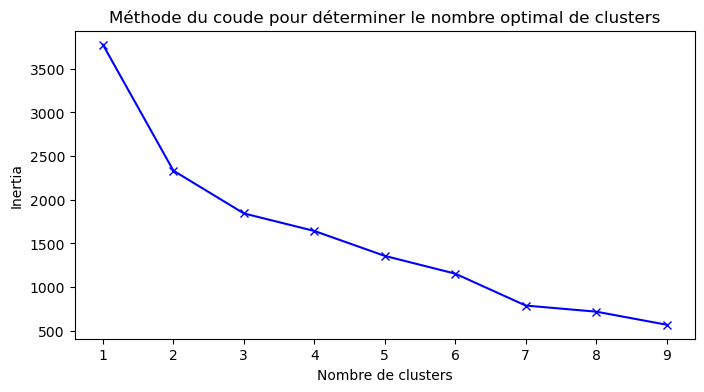

In [5]:
inertia = []
K = range(1, 10)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=0).fit(df1_x)
    inertia.append(kmeans.inertia_)

# Tracer le graphique de l'inertie
plt.figure(figsize=(8, 4))
plt.plot(K, inertia, 'bx-')
plt.xlabel('Nombre de clusters')
plt.ylabel('Inertia')
plt.title('Méthode du coude pour déterminer le nombre optimal de clusters')
plt.show()

# Test de plussieurs models avec GridsearchCV pour tirer les meuilleur parametres

In [7]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score, make_scorer
import pandas as pd
import numpy as np
import time

# Custom scorer using silhouette_score
def silhouette_scorer(estimator, df1_x):
    cluster_labels = estimator.fit_predict(df1_x)
    if len(np.unique(cluster_labels)) > 1:
        score = silhouette_score(df1_x, cluster_labels)
    else:
        score = -1  # if only one cluster, silhouette score is not defined
    return score

# Create pipelines for each model
kmeans_pipe = Pipeline([('kmeans', KMeans(random_state=42))])
dbscan_pipe = Pipeline([('dbscan', DBSCAN())])
agglo_pipe = Pipeline([('agglo', AgglomerativeClustering())])

# Define parameter grids to search for each model
kmeans_param_grid = {'kmeans__n_clusters': range(2, 5)}
dbscan_param_grid = {'dbscan__eps': [0.05, 0.1], 'dbscan__min_samples': range(3,5)}
agglo_param_grid = {'agglo__n_clusters': range(2, 5)}

# Use GridSearchCV to find the best parameters for each model
start_time = time.time()
kmeans_grid_search = GridSearchCV(kmeans_pipe, kmeans_param_grid, scoring=silhouette_scorer, cv=4, return_train_score=True)
kmeans_grid_search.fit(df1_x)
end_time = time.time()
kmeans_execution_time = end_time - start_time

start_time = time.time()
dbscan_grid_search = GridSearchCV(dbscan_pipe, dbscan_param_grid, scoring=silhouette_scorer, cv=4, return_train_score=True)
dbscan_grid_search.fit(df1_x)
end_time = time.time()
dbscan_execution_time = end_time - start_time

start_time = time.time()
agglo_grid_search = GridSearchCV(agglo_pipe, agglo_param_grid, scoring=silhouette_scorer, cv=4, return_train_score=True)
agglo_grid_search.fit(df1_x)
end_time = time.time()
agglo_execution_time = end_time - start_time

# Get the best scores and parameters for each model
best_kmeans_score = kmeans_grid_search.best_score_
best_kmeans_params = kmeans_grid_search.best_params_

best_dbscan_score = dbscan_grid_search.best_score_
best_dbscan_params = dbscan_grid_search.best_params_

best_agglo_score = agglo_grid_search.best_score_
best_agglo_params = agglo_grid_search.best_params_

# Display the results including execution times
print("Best score for K-means:", best_kmeans_score)
print("Best parameters for K-means:", best_kmeans_params)
'''
print("Execution time for K-means:", kmeans_execution_time, "seconds \n")
print("Validation scores for each fold for K-means:")
print(kmeans_grid_search.cv_results_['split0_test_score'])
print(kmeans_grid_search.cv_results_['split1_test_score'])
print(kmeans_grid_search.cv_results_['split2_test_score'])
'''

print("\nBest score for DBSCAN:", best_dbscan_score)
print("Best parameters for DBSCAN:", best_dbscan_params)
'''
print("Execution time for DBSCAN:", dbscan_execution_time, "seconds \n")
print("Validation scores for each fold for DBSCAN:")
print(dbscan_grid_search.cv_results_['split0_test_score'])
print(dbscan_grid_search.cv_results_['split1_test_score'])
print(dbscan_grid_search.cv_results_['split2_test_score'])
'''

print("\nBest score for Agglomerative Clustering:", best_agglo_score)
print("Best parameters for Agglomerative Clustering:", best_agglo_params)
'''
print("Execution time for Agglomerative Clustering:", agglo_execution_time, "seconds \n")
print("Validation scores for each fold for Agglomerative Clustering:")
print(agglo_grid_search.cv_results_['split0_test_score'])
print(agglo_grid_search.cv_results_['split1_test_score'])
print(agglo_grid_search.cv_results_['split2_test_score'])
'''

Best score for K-means: 0.38199104956749974
Best parameters for K-means: {'kmeans__n_clusters': 3}

Best score for DBSCAN: 0.6784980291897212
Best parameters for DBSCAN: {'dbscan__eps': 0.05, 'dbscan__min_samples': 3}

Best score for Agglomerative Clustering: 0.3330545869913911
Best parameters for Agglomerative Clustering: {'agglo__n_clusters': 2}


'\nprint("Execution time for Agglomerative Clustering:", agglo_execution_time, "seconds \n")\nprint("Validation scores for each fold for Agglomerative Clustering:")\nprint(agglo_grid_search.cv_results_[\'split0_test_score\'])\nprint(agglo_grid_search.cv_results_[\'split1_test_score\'])\nprint(agglo_grid_search.cv_results_[\'split2_test_score\'])\n'

# Test des parametres du modele sur le dataset

In [8]:
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score
import pandas as pd
import time

# K-Means
start_time = time.time()
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(df1_x)
kmeans_silhouette = silhouette_score(df1_x, kmeans_labels)
kmeans_execution_time = time.time() - start_time

# Dbscan
start_time = time.time()
dbscan = DBSCAN(eps=0.05, min_samples=3)
dbscan_labels = dbscan.fit_predict(df1_x)
dbscan_silhouette = silhouette_score(df1_x, dbscan_labels) if len(set(dbscan_labels)) > 1 else -1
num_dbscan_clusters = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)
dbscan_execution_time = time.time() - start_time

# Agglomerative Clustering
start_time = time.time()
agglo = AgglomerativeClustering(n_clusters=2)
agglo_labels = agglo.fit_predict(df1_x)
agglo_silhouette = silhouette_score(df1_x, agglo_labels)
agglo_execution_time = time.time() - start_time


# Afficher les résultats avec le temps d'exécution
print(f"K-means silhouette score : {kmeans_silhouette}")
print(f"K-means execution time : {kmeans_execution_time} seconds \n")

print(f"\nDBSCAN silhouette score : {dbscan_silhouette}")
print(f"DBSCAN number of clusters : {num_dbscan_clusters}")
print(f"DBSCAN execution time : {dbscan_execution_time} seconds \n")

print(f"\nAgglomerative Clustering silhouette score : {agglo_silhouette}")
print(f"Agglomerative Clustering execution time : {agglo_execution_time} seconds")

K-means silhouette score : 0.3300778095413022
K-means execution time : 9.075072765350342 seconds 


DBSCAN silhouette score : 0.523517023219764
DBSCAN number of clusters : 60
DBSCAN execution time : 12.31374454498291 seconds 


Agglomerative Clustering silhouette score : 0.3185138994996993
Agglomerative Clustering execution time : 106.99697637557983 seconds


In [9]:
df1['KMeans_Cluster'] = kmeans_labels
#df1['DBSCAN_Cluster'] = dbscan_labels
#df1['Agglo_Cluster'] = agglo_labels

C:\Users\GAMMING\AppData\Local\Temp\ipykernel_6376\2766454867.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['KMeans_Cluster'] = kmeans_labels


# Label encoding

In [11]:
df1.iloc[3070:3090,:]

,SC,SP,Periode,Device_trust,Friendship,Localisation,Reputation,Experiance,KMeans_Cluster
3279,h1,f4,217,0.999783,0.500000,0.212492,0.743235,0.340000,2
3280,h1,f5,217,1.000000,0.500000,0.269286,0.724204,0.340000,2
3281,h1,h4,217,1.000000,0.500000,0.367107,0.643720,0.220000,2
3282,f5,f4,217,0.999783,0.333333,0.552963,0.743235,0.534034,0
3283,f5,h4,217,1.000000,0.000000,0.480404,0.643720,0.500000,0
3284,f5,f3,217,1.000000,0.333333,0.375065,0.724857,0.400000,0
3285,h5,f1,218,1.000000,0.333333,0.119574,0.724377,0.967679,2
3286,h5,f1,218,1.000000,0.333333,0.119574,0.724377,0.967679,2
3287,f2,f1,218,1.000000,0.500000,0.742268,0.724377,0.981250,1
3288,f2,f4,218,0.999874,0.250000,0.292101,0.743235,0.681667,0


In [13]:
#0 untrustworthy
#1 trustworthy
#2 entre deux

def map_kmeans_to_trust(df):
    # Define mapping of KMeans cluster labels to trust values
    kmeans_mapping = {
        0: 0.0,   # Trust value for label 0
        1: 1.0,   # Trust value for label 1
        2: 0.5    # Trust value for label 2
        # Add more mappings as needed for other cluster labels
    }
    
    # Map KMeans_Cluster to trust values
    df['knwoledge'] = df['KMeans_Cluster'].map(kmeans_mapping)
    
    return df

# Apply the mapping function
df1 = map_kmeans_to_trust(df1)

C:\Users\GAMMING\AppData\Local\Temp\ipykernel_6376\3630624052.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['knwoledge'] = df['KMeans_Cluster'].map(kmeans_mapping)


In [14]:
df1['trust'] = 0.55 * df1['Experiance'] + 0.45 * df1['knwoledge']

C:\Users\GAMMING\AppData\Local\Temp\ipykernel_6376\498739426.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['trust'] = 0.55 * df1['Experiance'] + 0.45 * df1['knwoledge']


In [15]:
df1.iloc[3070:3090,:]

,SC,SP,Periode,Device_trust,Friendship,Localisation,Reputation,Experiance,KMeans_Cluster,knwoledge,trust
3279,h1,f4,217,0.999783,0.500000,0.212492,0.743235,0.340000,2,0.5,0.412000
3280,h1,f5,217,1.000000,0.500000,0.269286,0.724204,0.340000,2,0.5,0.412000
3281,h1,h4,217,1.000000,0.500000,0.367107,0.643720,0.220000,2,0.5,0.346000
3282,f5,f4,217,0.999783,0.333333,0.552963,0.743235,0.534034,0,0.0,0.293719
3283,f5,h4,217,1.000000,0.000000,0.480404,0.643720,0.500000,0,0.0,0.275000
3284,f5,f3,217,1.000000,0.333333,0.375065,0.724857,0.400000,0,0.0,0.220000
3285,h5,f1,218,1.000000,0.333333,0.119574,0.724377,0.967679,2,0.5,0.757223
3286,h5,f1,218,1.000000,0.333333,0.119574,0.724377,0.967679,2,0.5,0.757223
3287,f2,f1,218,1.000000,0.500000,0.742268,0.724377,0.981250,1,1.0,0.989688
3288,f2,f4,218,0.999874,0.250000,0.292101,0.743235,0.681667,0,0.0,0.374917


In [54]:
#trustworthy
df1[(df1['trust'] < 0.53) & (df1['KMeans_Cluster'] == 1)]    #min trust value for trustworthy nodes

,SC,SP,Periode,Device_trust,Friendship,Localisation,Reputation,Experiance,KMeans_Cluster,knwoledge,trust


In [52]:
#untrustworthy
df1[(df1['trust'] > 0.55) & (df1['KMeans_Cluster'] == 0)]    #MAX true value for untrustworthy nodes  

,SC,SP,Periode,Device_trust,Friendship,Localisation,Reputation,Experiance,KMeans_Cluster,knwoledge,trust


# Train avec le PCA

In [6]:
df2 = data[data['Periode'] > 20]
df2_x = df2[['Device_trust','Friendship', 'Localisation', 'Reputation']]
df2_x.shape

(32071, 4)

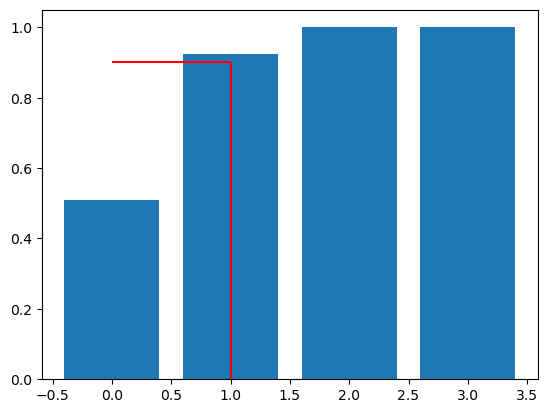

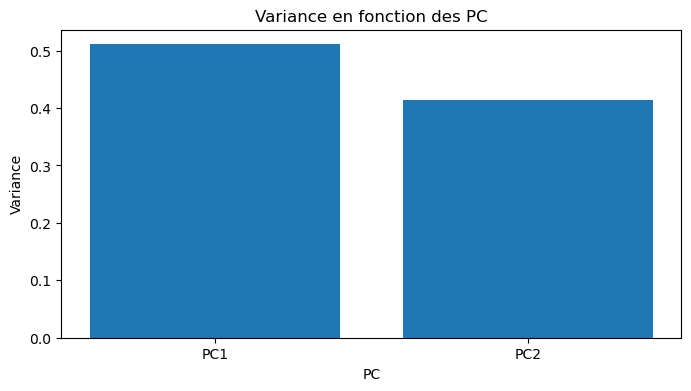

C:\Users\GAMMING\AppData\Local\Temp\ipykernel_7068\2552083551.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['PC1'] = pca_result[:, 0]
C:\Users\GAMMING\AppData\Local\Temp\ipykernel_7068\2552083551.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['PC2'] = pca_result[:, 1]


In [7]:
n_dims = df2_x.shape[1]
model = PCA(n_components=n_dims)
model.fit(df2_x)

variances = model.explained_variance_ratio_
min_variance = 0.90

meilleur_dims = np.argmax(np.cumsum(variances) > min_variance)


plt.bar(range(n_dims), np.cumsum(variances))
plt.hlines(min_variance, 0, meilleur_dims, colors='r')
plt.vlines(meilleur_dims, 0, min_variance, colors='r')

# Apply PCA to reduce to 2 dimensions
pca = PCA(n_components=2)
pca_data = pca.fit_transform(df2_x)
pca_df = pd.DataFrame(data=pca_data, columns=['PC1', 'PC2'])

# Plot the explained variance ratio of each principal component
plt.figure(figsize=(8, 4))
plt.bar(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, tick_label=['PC1', 'PC2'])
plt.xlabel('PC')
plt.ylabel('Variance')
plt.title('Variance en fonction des PC')
plt.show()

# Calcul du PCA pour 2 dimensions
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df2_x)

# Ajout des nouvelles dimensions au DataFrame existant
df2['PC1'] = pca_result[:, 0]
df2['PC2'] = pca_result[:, 1]

In [8]:
df2.head()

,SC,SP,Periode,Device_trust,Friendship,Localisation,Reputation,Experiance,PC1,PC2
209,h1,f2,21,0.999996,0.500000,0.556362,0.595357,0.590667,-0.077162,0.071675
210,h1,f4,21,0.998682,0.500000,0.212492,0.568519,0.340000,0.267097,0.064125
211,h1,h2,21,0.999996,0.500000,0.439370,0.590000,0.460000,0.039888,0.069220
212,f1,f2,21,0.999996,0.666667,0.742268,0.595357,0.830000,-0.259628,0.241879
213,f1,f4,21,0.998682,0.333333,0.163344,0.568519,0.500000,0.312859,-0.103397


In [9]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score, make_scorer
import pandas as pd
import numpy as np
import time

x = df2[['PC1', 'PC2']] 
# Custom scorer using silhouette_score
def silhouette_scorer(estimator, X):
    cluster_labels = estimator.fit_predict(X)
    if len(np.unique(cluster_labels)) > 1:
        score = silhouette_score(X, cluster_labels)
    else:
        score = -1  # if only one cluster, silhouette score is not defined
    return score


# Create pipelines for each model
kmeans_pipe = Pipeline([('kmeans', KMeans(random_state=42))])
dbscan_pipe = Pipeline([('dbscan', DBSCAN())])
agglo_pipe = Pipeline([('agglo', AgglomerativeClustering())])

# Define parameter grids to search for each model
kmeans_param_grid = {'kmeans__n_clusters': range(2,5)}
dbscan_param_grid = {'dbscan__eps': [0.05, 0.1], 'dbscan__min_samples': range(2, 5)}
agglo_param_grid = {'agglo__n_clusters': range(2,5)}

# Use GridSearchCV to find the best parameters for each model
start_time = time.time()
kmeans_grid_search = GridSearchCV(kmeans_pipe, kmeans_param_grid, scoring=silhouette_scorer, cv=3)
kmeans_grid_search.fit(df2_x)
end_time = time.time()
kmeans_execution_time = end_time - start_time

start_time = time.time()
dbscan_grid_search = GridSearchCV(dbscan_pipe, dbscan_param_grid, scoring=silhouette_scorer, cv=3)
dbscan_grid_search.fit(df2_x)
end_time = time.time()
dbscan_execution_time = end_time - start_time

start_time = time.time()
agglo_grid_search = GridSearchCV(agglo_pipe, agglo_param_grid, scoring=silhouette_scorer, cv=3)
agglo_grid_search.fit(df2_x)
end_time = time.time()
agglo_execution_time = end_time - start_time

# Get the best scores and parameters for each model
best_kmeans_score = kmeans_grid_search.best_score_
best_kmeans_params = kmeans_grid_search.best_params_

best_dbscan_score = dbscan_grid_search.best_score_
best_dbscan_params = dbscan_grid_search.best_params_

best_agglo_score = agglo_grid_search.best_score_
best_agglo_params = agglo_grid_search.best_params_

# Display the results including execution times
print("Best score for K-means:", best_kmeans_score)
print("Best parameters for K-means:", best_kmeans_params)
#print("Execution time for K-means:", kmeans_execution_time, "seconds")

print("\nBest score for DBSCAN:", best_dbscan_score)
print("Best parameters for DBSCAN:", best_dbscan_params)
#print("Execution time for DBSCAN:", dbscan_execution_time, "seconds")

print("\nBest score for Agglomerative Clustering:", best_agglo_score)
print("Best parameters for Agglomerative Clustering:", best_agglo_params)
#print("Execution time for Agglomerative Clustering:", agglo_execution_time, "seconds")


Best score for K-means: 0.3815770156106626
Best parameters for K-means: {'kmeans__n_clusters': 2}

Best score for DBSCAN: 0.6605136199134054
Best parameters for DBSCAN: {'dbscan__eps': 0.05, 'dbscan__min_samples': 3}

Best score for Agglomerative Clustering: 0.33297452635799857
Best parameters for Agglomerative Clustering: {'agglo__n_clusters': 2}


In [19]:
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score
import pandas as pd
import time

x = df2[['PC1', 'PC2']]

# Mesurer le temps d'exécution pour K-means
start_time = time.time()
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans_labels = kmeans.fit_predict(df2_x)
kmeans_silhouette = silhouette_score(df2_x, kmeans_labels)
kmeans_execution_time = time.time() - start_time

# Mesurer le temps d'exécution pour DBSCAN
start_time = time.time()
dbscan = DBSCAN(eps=0.05, min_samples=3)
dbscan_labels = dbscan.fit_predict(df2_x)
dbscan_silhouette = silhouette_score(df2_x, dbscan_labels) if len(set(dbscan_labels)) > 1 else -1
num_dbscan_clusters = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)
dbscan_execution_time = time.time() - start_time

# Mesurer le temps d'exécution pour Agglomerative Clustering
start_time = time.time()
agglo = AgglomerativeClustering(n_clusters=2)
agglo_labels = agglo.fit_predict(df2_x)
agglo_silhouette = silhouette_score(df2_x, agglo_labels)
agglo_execution_time = time.time() - start_time

# Afficher les résultats avec le temps d'exécution
print(f"K-means silhouette score : {kmeans_silhouette}")
print(f"K-means execution time : {kmeans_execution_time} seconds \n")

print(f"\nDBSCAN silhouette score : {dbscan_silhouette}")
print(f"DBSCAN number of clusters : {num_dbscan_clusters}")
print(f"DBSCAN execution time : {dbscan_execution_time} seconds \n")

print(f"\nAgglomerative Clustering silhouette score : {agglo_silhouette}")
print(f"Agglomerative Clustering execution time : {agglo_execution_time} seconds")

K-means silhouette score : 0.3647547699393253
K-means execution time : 9.7327880859375 seconds 


DBSCAN silhouette score : 0.523517023219764
DBSCAN number of clusters : 60
DBSCAN execution time : 9.428378105163574 seconds 


Agglomerative Clustering silhouette score : 0.3185138994996993
Agglomerative Clustering execution time : 31.55366802215576 seconds


In [20]:
# Ajouter les labels au datasets
df2['KMeans_Cluster'] = kmeans_labels
df2['DBSCAN_Cluster'] = dbscan_labels
df2['Agglo_Cluster'] = agglo_labels

C:\Users\GAMMING\AppData\Local\Temp\ipykernel_7068\1171839643.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['KMeans_Cluster'] = kmeans_labels
C:\Users\GAMMING\AppData\Local\Temp\ipykernel_7068\1171839643.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['DBSCAN_Cluster'] = dbscan_labels
C:\Users\GAMMING\AppData\Local\Temp\ipykernel_7068\1171839643.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value 

In [21]:
df2      #1 trustworthy     0 untrustworthy

,SC,SP,Periode,Device_trust,Friendship,Localisation,Reputation,Experiance,PC1,PC2,KMeans_Cluster,DBSCAN_Cluster,Agglo_Cluster
209,h1,f2,21,0.999996,0.500000,0.556362,0.595357,0.590667,-0.077162,0.071675,1,0,0
210,h1,f4,21,0.998682,0.500000,0.212492,0.568519,0.340000,0.267097,0.064125,0,1,0
211,h1,h2,21,0.999996,0.500000,0.439370,0.590000,0.460000,0.039888,0.069220,0,2,0
212,f1,f2,21,0.999996,0.666667,0.742268,0.595357,0.830000,-0.259628,0.241879,1,3,1
213,f1,f4,21,0.998682,0.333333,0.163344,0.568519,0.500000,0.312859,-0.103397,0,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32275,f4,h2,1800,1.000000,0.000000,0.063508,0.802628,0.500000,0.401339,-0.431415,0,10,0
32276,f4,h3,1800,1.000000,0.500000,0.440104,0.799375,0.973158,0.035056,0.075546,0,2,0
32277,f2,f4,1800,1.000000,0.250000,0.292101,0.828380,0.966791,0.177382,-0.176319,0,36,0
32278,f2,h2,1800,1.000000,0.250000,0.768221,0.802628,0.966773,-0.298045,-0.167762,1,26,1


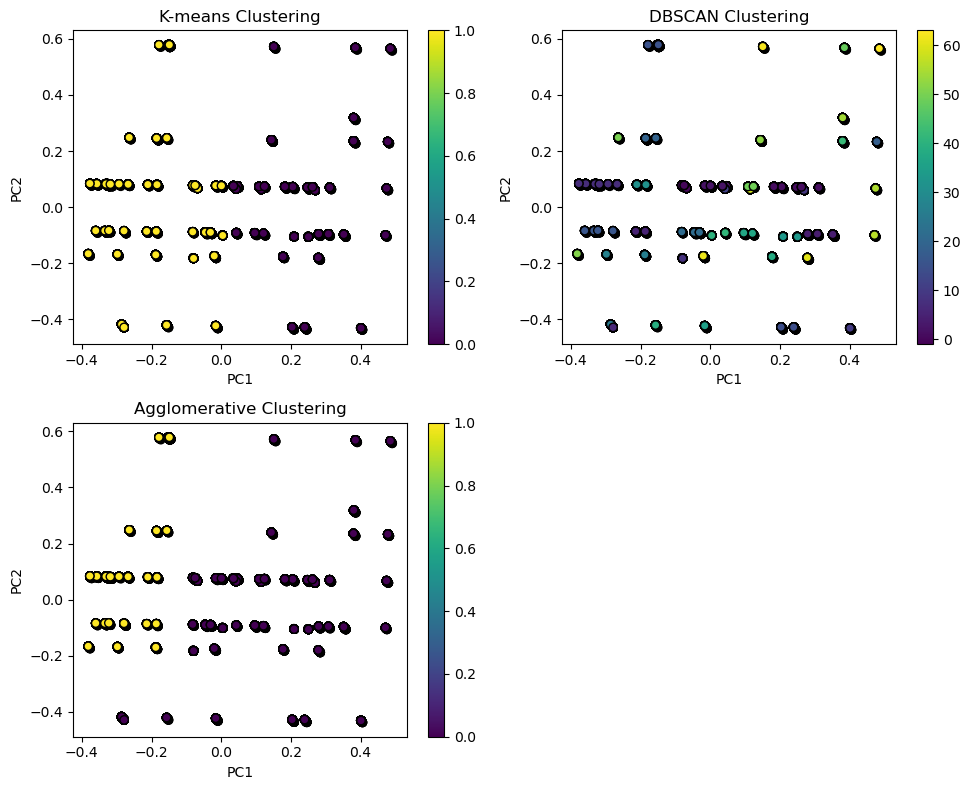

In [18]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))

# Plot K-means clusters
plt.subplot(2, 2, 1)
plt.scatter(df2['PC1'], df2['PC2'], c=df2['KMeans_Cluster'], cmap='viridis', edgecolors='k')
plt.title('K-means Clustering')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.colorbar()

# Plot DBSCAN clusters
plt.subplot(2, 2, 2)
plt.scatter(df2['PC1'], df2['PC2'], c=df2['DBSCAN_Cluster'], cmap='viridis', edgecolors='k')
plt.title('DBSCAN Clustering')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.colorbar()

# Plot Agglomerative Clustering clusters
plt.subplot(2, 2, 3)
plt.scatter(df2['PC1'], df2['PC2'], c=df2['Agglo_Cluster'], cmap='viridis', edgecolors='k')
plt.title('Agglomerative Clustering')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.colorbar()

plt.tight_layout()
plt.show()

In [25]:
#1 trustworthy 
#0 untrustworthy

def map_kmeans_to_trust(df):
    # Define mapping of KMeans cluster labels to trust values
    kmeans_mapping = {
        0: 0.0,   # Trust value for label 0
        1: 1.0,   # Trust value for label 1
    }
    
    # Map KMeans_Cluster to trust values
    df['knwoledge'] = df['KMeans_Cluster'].map(kmeans_mapping)
    
    return df

# Apply the mapping function
df2 = map_kmeans_to_trust(df2)

In [26]:
df2['trust'] = 0.55 * df2['Experiance'] + 0.45 * df2['knwoledge']

In [27]:
df2

,SC,SP,Periode,Device_trust,Friendship,Localisation,Reputation,Experiance,PC1,PC2,KMeans_Cluster,DBSCAN_Cluster,Agglo_Cluster,knwoledge,trust
0,h3,f1,1,0.5,0.500000,0.659381,0.500000,0.500000,-0.138985,0.086872,1,-1,0,0.0,0.275000
1,f5,f1,1,0.5,0.666667,0.160152,0.500000,0.500000,0.381046,0.167408,0,-1,0,1.0,0.725000
2,f5,f4,1,0.5,0.333333,0.588969,0.500000,0.500000,-0.097730,-0.089046,1,-1,0,0.0,0.275000
3,f5,h3,1,0.5,0.000000,0.288745,0.500000,0.500000,0.141842,-0.467570,0,-1,0,1.0,0.725000
4,f5,h4,1,0.5,0.000000,0.534638,0.500000,0.500000,-0.100445,-0.426397,1,-1,0,0.0,0.275000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32532,h1,f1,1800,1.0,0.000000,0.859581,0.826655,0.340000,-0.428995,-0.356502,1,31,0,0.0,0.187000
32533,h1,f2,1800,1.0,0.500000,0.655126,0.833292,0.262000,-0.143334,0.101958,1,33,1,0.0,0.144100
32534,h1,f3,1800,1.0,0.500000,0.514245,0.832246,0.310000,-0.004493,0.078320,1,27,0,0.0,0.170500
32535,h1,f4,1800,1.0,0.500000,0.212562,0.829547,0.388333,0.292834,0.027679,0,32,0,1.0,0.663583


In [28]:
#trustworthy
df2[(df2['trust'] > 0.59) & (df2['KMeans_Cluster'] == 0)]

,SC,SP,Periode,Device_trust,Friendship,Localisation,Reputation,Experiance,PC1,PC2,KMeans_Cluster,DBSCAN_Cluster,Agglo_Cluster,knwoledge,trust
1,f5,f1,1,0.500000,0.666667,0.160152,0.500000,0.500000,0.381046,0.167408,0,-1,0,1.0,0.725000
3,f5,h3,1,0.500000,0.000000,0.288745,0.500000,0.500000,0.141842,-0.467570,0,-1,0,1.0,0.725000
5,h5,f1,1,0.500000,0.333333,0.119574,0.500000,0.500000,0.364780,-0.167641,0,-1,0,1.0,0.725000
8,h5,h3,1,0.500000,0.666667,0.334537,0.500000,0.500000,0.209219,0.196607,0,-1,0,1.0,0.725000
11,h1,h4,2,0.901027,0.500000,0.384645,0.500000,0.500000,0.131651,0.040993,0,-1,0,1.0,0.725000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32527,f5,f1,1800,1.000000,0.666667,0.160152,0.826655,0.792388,0.372673,0.182895,0,30,0,1.0,0.885813
32528,f5,f2,1800,1.000000,1.000000,0.163508,0.833292,0.853734,0.425446,0.512023,0,56,0,1.0,0.919554
32529,f5,f3,1800,1.000000,0.333333,0.436003,0.832246,0.951986,0.044477,-0.098909,0,29,0,1.0,0.973592
32535,h1,f4,1800,1.000000,0.500000,0.212562,0.829547,0.388333,0.292834,0.027679,0,32,0,1.0,0.663583


In [47]:
#untrustworthy
df2[(df2['trust'] < 0.59) & (df2['KMeans_Cluster'] == 1)]

,SC,SP,Periode,Device_trust,Friendship,Localisation,Reputation,Experiance,KMeans_Cluster,knwoledge,trust,PC1,PC2,DBSCAN_Cluster,Agglo_Cluster
253,f4,f1,21,0.999997,0.500000,0.163344,0.640000,0.665000,1,0.0,0.365750,0.346262,0.009995,0,1
254,f4,h2,21,0.999996,0.000000,0.120203,0.500000,0.500000,1,0.0,0.275000,0.307191,-0.495994,1,1
255,h5,h2,21,0.999996,0.666667,0.020500,0.500000,0.850000,1,0.0,0.467500,0.518727,0.143580,2,1
258,h5,h1,21,0.999995,0.333333,0.199552,0.500000,0.300000,1,0.0,0.165000,0.285677,-0.154406,5,1
259,h5,h2,21,0.999996,0.666667,0.020500,0.500000,0.580000,1,0.0,0.319000,0.518727,0.143580,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32527,f5,f1,1800,1.000000,0.666667,0.160152,0.826655,0.792388,1,0.0,0.435813,0.373182,0.182103,22,1
32528,f5,f2,1800,1.000000,1.000000,0.163508,0.833292,0.853734,1,0.0,0.469554,0.426371,0.511172,30,1
32529,f5,f3,1800,1.000000,0.333333,0.436003,0.832246,0.951986,1,0.0,0.523592,0.044635,-0.099292,3,0
32535,h1,f4,1800,1.000000,0.500000,0.212562,0.829547,0.388333,1,0.0,0.213583,0.293152,0.026980,0,1
